<a href="https://colab.research.google.com/github/darren-sm/LE2_Malibiran_D/blob/main/ML_Laboratory_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Laboratory Exam - Classification
**Name:** Darren S. Malibiran

**Section:** CS - 4202

**Content**:
- Library and Dataset
- Data Exploratory and Preprocessing
  - Dropping rows
  - Changing datatype
  - Creating new columns
- Model development
- Evaluation
- Persistence

## I. Library and Dataset

In [ ]:
!pip install ucimlrepo pandas seaborn scikit-learn

**Dataset:** Occupancy Dataset from UCI

**URL:** https://archive.ics.uci.edu/dataset/357/occupancy+detection

> Fetch the data using the third party package of UCI

In [ ]:
import ucimlrepo
import pandas as pd
data = ucimlrepo.fetch_ucirepo(id=357).data
df = data.original

## II. Data Exploratory and Preprocessing

In [ ]:
df

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.272,426,721.25,0.00479298817650529,1.0
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714,0.00478344094931065,1.0
2,3,2015-02-04 17:53:00,23.15,27.245,426,713.5,0.00477946352442199,1.0
3,4,2015-02-04 17:54:00,23.15,27.2,426,708.25,0.00477150882608175,1.0
4,5,2015-02-04 17:55:00,23.1,27.2,426,704.5,0.00475699293331518,1.0
...,...,...,...,...,...,...,...,...
20557,9748,2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.00421296819328694,1.0
20558,9749,2015-02-18 09:16:00,20.865,27.745,423.5,1514.5,0.00423026193160229,1.0
20559,9750,2015-02-18 09:16:59,20.89,27.745,423.5,1521.5,0.00423681810140671,1.0
20560,9751,2015-02-18 09:17:59,20.89,28.0225,418.75,1632,0.0042794854718673,1.0


### 1. Inspect record per ID

In [ ]:
df[df.duplicated('id', keep=False) == False]

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
18953,8144,2015-02-17 06:30:59,20.5,30.39,0,748.5,0.0045326819356264,0.0
18954,8145,2015-02-17 06:32:00,20.5,30.39,0,751.5,0.0045326819356264,0.0
18955,8146,2015-02-17 06:33:00,20.5,30.39,0,748.5,0.0045326819356264,0.0
18956,8147,2015-02-17 06:34:00,20.5,30.39,0,752,0.0045326819356264,0.0
18957,8148,2015-02-17 06:35:00,20.5,30.39,0,754.5,0.0045326819356264,0.0
...,...,...,...,...,...,...,...,...
20557,9748,2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.00421296819328694,1.0
20558,9749,2015-02-18 09:16:00,20.865,27.745,423.5,1514.5,0.00423026193160229,1.0
20559,9750,2015-02-18 09:16:59,20.89,27.745,423.5,1521.5,0.00423681810140671,1.0
20560,9751,2015-02-18 09:17:59,20.89,28.0225,418.75,1632,0.0042794854718673,1.0


In [ ]:
df[df.duplicated('id', keep=False) == True].sort_values(by=['id'])

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.272,426,721.25,0.00479298817650529,1.0
10810,1,2015-02-11 14:48:00,21.76,31.1333333333333,437.333333333333,1029.66666666667,0.00502101089021385,1.0
10819,10,2015-02-11 14:57:00,21.79,31.4633333333333,437.333333333333,1027.33333333333,0.00508405259531726,1.0
9,10,2015-02-04 18:00:00,23.075,27.175,419,688,0.00474535071966655,1.0
10909,100,2015-02-11 16:27:00,21.865,30.15,438,766.75,0.00489271060254199,1.0
...,...,...,...,...,...,...,...,...
9003,999,2015-02-03 04:38:00,20.39,22.5,0,431.75,0.00332675846769344,0.0
998,999,2015-02-05 10:28:59,22,26.29,469,1024,0.00429752476185875,1.0
11808,999,2015-02-12 07:25:59,20.55,22.29,0,741,0.00332842453898209,0.0
10809,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,NaN


In [ ]:
df.groupby('id').size().mean()

2.108274377114734

- 1609 houses/ids have only a single record
- Some can have 2 or 3
- The average row count per ID is 2.11

> Drop weird rows

In [ ]:
df = df.drop([10809, 8143])

### 2. Change into proper column datatypes

In [ ]:
df.dtypes

id                object
date              object
Temperature       object
Humidity          object
Light             object
CO2               object
HumidityRatio     object
Occupancy        float64
dtype: object

In [ ]:
col_types = {
    'id': int,
    'date': 'datetime64[ns]',
    'Temperature': float,
    'Humidity': float,
    'Light': float,
    'CO2': float,
    'Occupancy': int
}
df = df.astype(col_types)


### 3. Create new columns
- weekday/weekend category
- hour groups

In [ ]:
def day_category(datetime):
  if datetime.weekday() >= 5:
    # weekend
    return 0
  # weekday
  return 1

def time_category(datetime):
  hour = datetime.hour

  if 1 <= hour < 5:
    # Dawn
    return 1
  elif 6 <= hour < 12:
    # Morning
    return 2
  elif 12 <= hour < 18:
    # Afternoon
    return 3
  else:
    # Night
    return 4

df['day_category'] = df['date'].apply(day_category)
df['time_category'] = df['date'].apply(time_category)
df.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day_category,time_category
0,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.00479298817650529,1,1,3
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.00478344094931065,1,1,3
2,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.00477946352442199,1,1,3
3,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.00477150882608175,1,1,3
4,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.00475699293331518,1,1,3


### 4. Split dataset
- 20% test
- Use ['day_category', 'time_category', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'] as the features and ['Occupancy'] as the target

In [ ]:
X = df[['day_category', 'time_category', 'Temperature', 'Humidity', 'Light', 'CO2']]
y = df['Occupancy']

## II. Model

- LogisticRegression
- KNN
- Tree:
  - RandomForest
  - Gradient Boosting
- SVM:
  - Support Vector Classification


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

model1 = LogisticRegression(max_iter=150)
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()
model5 = SVC()

labels = ["Logistic Regression", "KNN", "Random Forest", "Gradient Boosting", "SVC"]

### 5-fold Cross validation

In [ ]:
from collections import defaultdict
scores = defaultdict(list)

for name, model in zip(labels, [model1, model2, model3, model4, model5]):
    # Perform 5 fold CV
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

    # Store score to the dict
    scores['Model'].append(name)
    scores['Average'].append(np.mean(cv_scores))
    scores['Minimum'].append(np.min(cv_scores))
    scores['Maximum'].append(np.max(cv_scores))
    scores['Standard Dev.'].append(np.std(cv_scores))

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate
print(tabulate(scores, ['Model', "Average", "Minimum", "Maximum", "Standard Deviation"]))

Model                  Average    Minimum    Maximum    Standard Deviation
-------------------  ---------  ---------  ---------  --------------------
Logistic Regression   0.989932   0.988813   0.990759           0.000747193
KNN                   0.989835   0.98857    0.991245           0.000965439
Random Forest         0.993191   0.992218   0.994163           0.000687847
Gradient Boosting     0.990272   0.989056   0.991245           0.000842437
SVC                   0.989056   0.987597   0.990272           0.00100858


## III. Evaluation & Confusion Matrix

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=69)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

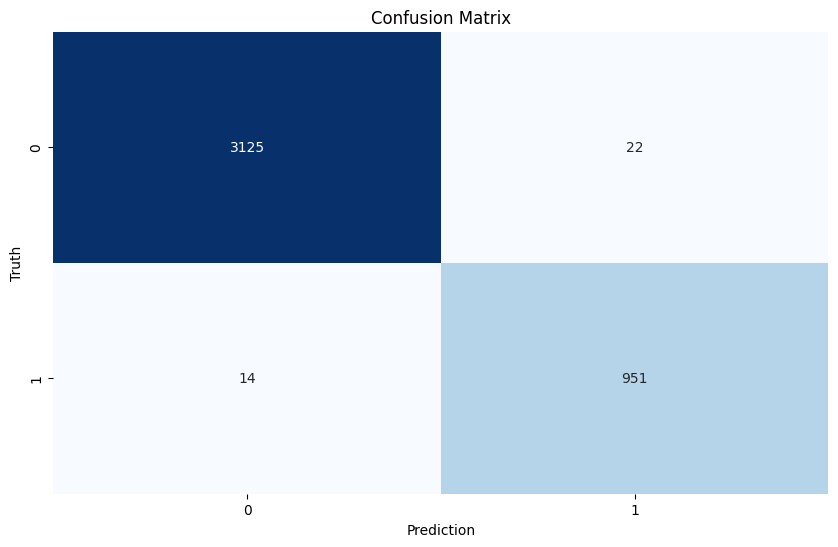

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

In [ ]:
y_test.shape

(4112,)

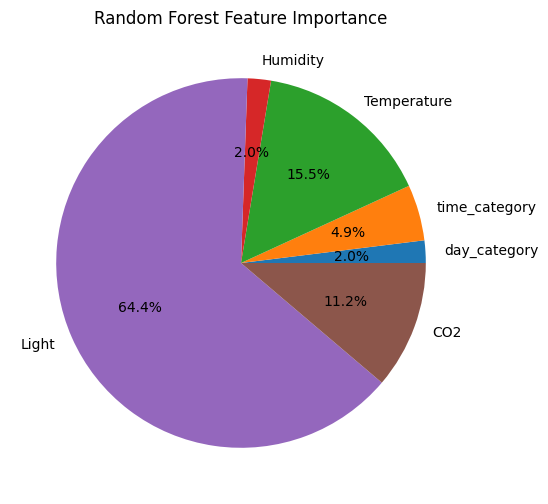

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.pie(feature_importances, labels=X.columns, autopct='%1.1f%%')
plt.title('Random Forest Feature Importance')
plt.show()

## IV. Saving the model

In [ ]:
from joblib import dump, load
dump(model, 'random_forest.joblib')
#model = load('model_multi.joblib')

['random_forest.joblib']